In [1]:
import pandas as pd

df = pd.read_csv("customer_churn_sample.csv")
df.shape


(5, 11)

In [2]:
df

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,InternetService,MonthlyCharges,TotalCharges,Churn
0,C1001,Female,0,Yes,No,5,Yes,DSL,70.35,350.75,No
1,C1002,Male,1,No,No,2,No,Fiber optic,89.10,178.20,Yes
2,C1003,Male,0,Yes,Yes,8,Yes,DSL,55.75,446.00,No
3,C1004,Female,0,No,No,1,Yes,Fiber optic,99.25,99.25,Yes
4,C1005,Female,1,Yes,Yes,12,Yes,DSL,65.10,781.20,No


In [3]:
print(df.columns)


Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'InternetService', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')


In [5]:
print(df.isnull().sum())

CustomerID         0
Gender             0
SeniorCitizen      0
Partner            0
Dependents         0
Tenure             0
PhoneService       0
InternetService    0
MonthlyCharges     0
TotalCharges       0
Churn              0
dtype: int64


In [7]:
print(df.dtypes)

CustomerID          object
Gender              object
SeniorCitizen        int64
Partner             object
Dependents          object
Tenure               int64
PhoneService        object
InternetService     object
MonthlyCharges     float64
TotalCharges       float64
Churn               object
dtype: object


In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [9]:
df

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,InternetService,MonthlyCharges,TotalCharges,Churn
0,C1001,Female,0,Yes,No,5,Yes,DSL,70.35,350.75,No
1,C1002,Male,1,No,No,2,No,Fiber optic,89.10,178.20,Yes
2,C1003,Male,0,Yes,Yes,8,Yes,DSL,55.75,446.00,No
3,C1004,Female,0,No,No,1,Yes,Fiber optic,99.25,99.25,Yes
4,C1005,Female,1,Yes,Yes,12,Yes,DSL,65.10,781.20,No


In [10]:
print(df['TotalCharges'].isnull().sum())

0


In [11]:
df.describe()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,5.000000,5.000000,5.000000,5.000000
mean,0.400000,5.600000,75.910000,371.080000
std,0.547723,4.505552,17.839051,267.076287
min,0.000000,1.000000,55.750000,99.250000
25%,0.000000,2.000000,65.100000,178.200000
50%,0.000000,5.000000,70.350000,350.750000
75%,1.000000,8.000000,89.100000,446.000000
max,1.000000,12.000000,99.250000,781.200000


<Axes: title={'center': 'Churn Rate'}, xlabel='Churn'>

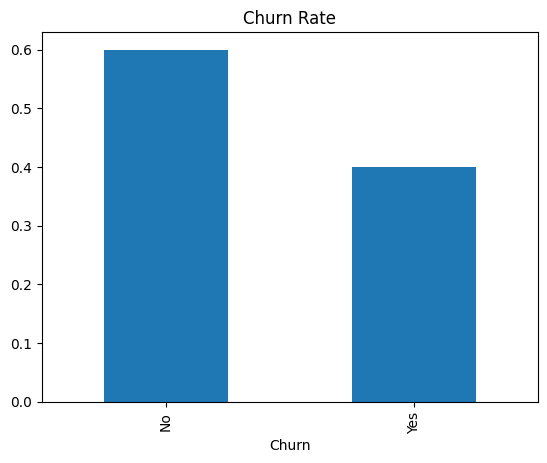

In [12]:
df['Churn'].value_counts(normalize=True).plot(kind='bar',title='Churn Rate')

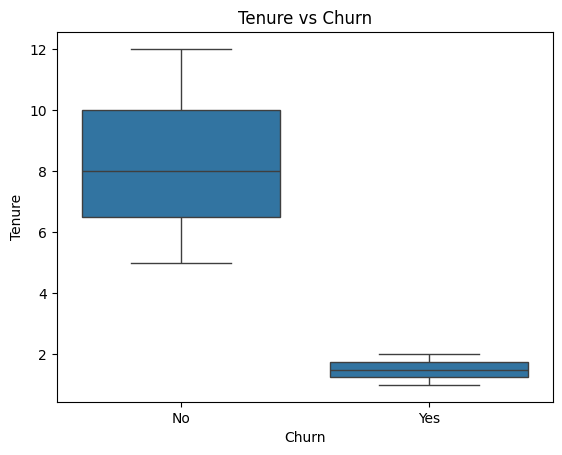

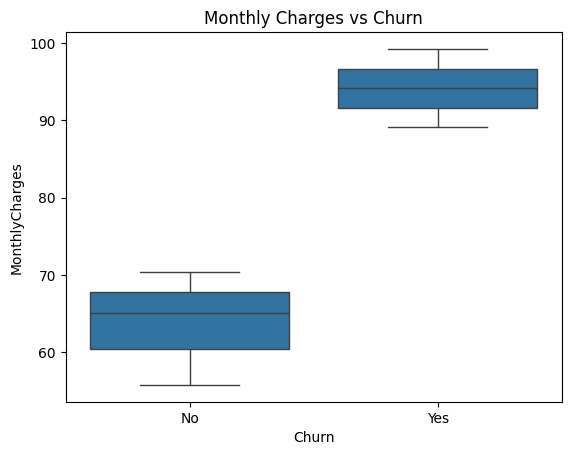

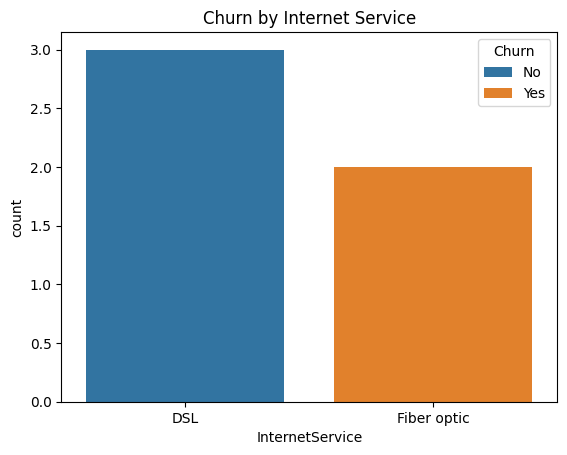

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

#Churn vs Tenure
sns.boxplot(x='Churn', y='Tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()

#Churn vs Monthly Charges
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

#Churn rate by Internet Service
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title("Churn by Internet Service")
plt.show()


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [16]:
df_encoded = df.copy()
le = LabelEncoder()

for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        df_encoded[column] = le.fit_transform(df_encoded[column])


In [17]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [19]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
 [[1]]

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



C:\Users\cbalusu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


C:\Users\cbalusu\AppData\Local\Temp\ipykernel_1232\3858087619.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


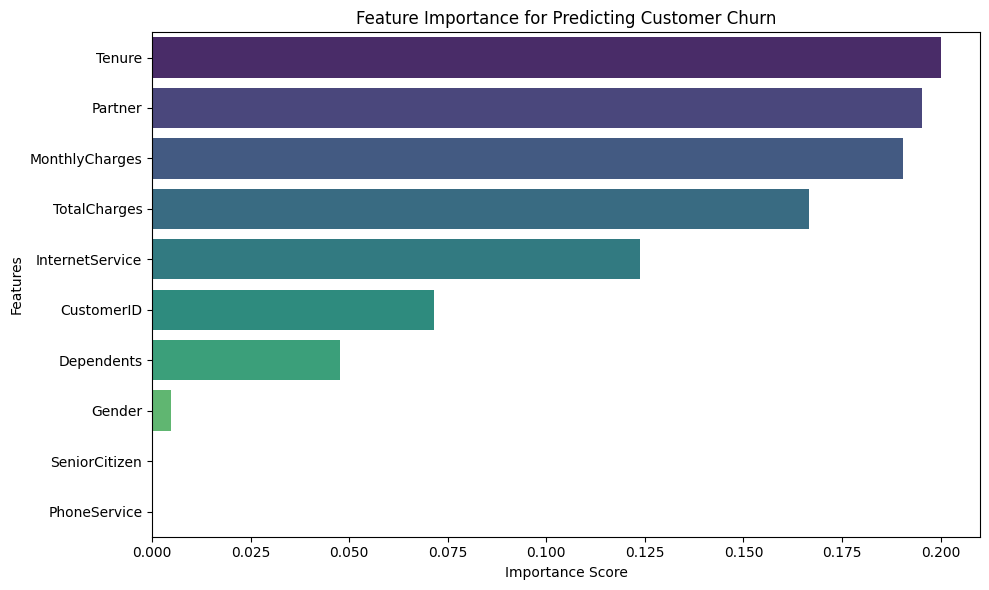

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Get feature importances from the model
importances = model.feature_importances_

#Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
#Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance for Predicting Customer Churn')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()
